# Part II - Ford GoBike Trip Data Exploration
## by Nancy Memory Mwila

## Investigation Overview

> In this analysis, I would like to figure that when and where are most trips taken, and what kind of characteristics are in these locations and time periods. The characteristics include rider's attributes (sex, age, and user_type) and duration of trips

## Dataset Overview

> This dataset includes 183,412 trips with 16 features such as locations, time, and user attributes. The dataset is subsetted by choosing top 10 trips start stations with the most trips. This data is only for the month of February.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_top10 = pd.read_csv('201902-fordgobike-tripdata-clean.csv')

In [4]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'start_month_char': ['Feb'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_top10[var] = df_top10[var].astype(ordered_var)

In [5]:
df_cust = df_top10.query('user_type == "Customer"')
df_sub = df_top10.query('user_type == "Subscriber"')

## The top 10 stations with the most trips

> All of the start stations with the most trips are in San Francisco and connect to public transportations such as Caltrain, Bart and Ferry.
 

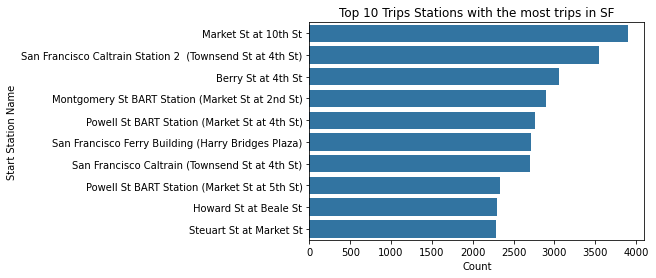

In [6]:
st_stat_counts = df_top10['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

base_color = sb.color_palette()[0]
sb.countplot(data=df_top10, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 10 Trips Stations with the most trips in SF');

## The time with most trips

>1. There are the most trips in the morning.
>2. There are the most trips during the weekdays than the weekends.

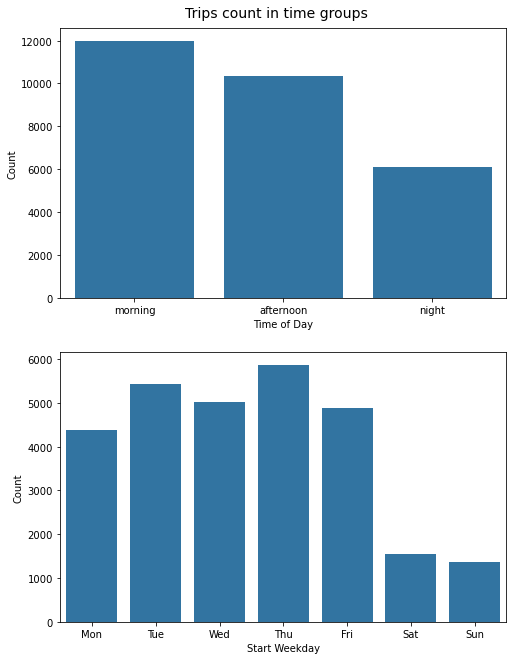

In [7]:
fig, ax = plt.subplots(nrows=2, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top10, x = 'period_day', color = default_color, ax = ax[0])
sb.countplot(data = df_top10, x = 'start_weekday_char', color = default_color, ax = ax[1])
ax[0].set_xlabel('Time of Day')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Start Weekday')
ax[1].set_ylabel('Count')
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips count in time groups', fontsize=14);

## The top 10 stations with the most trips by weekdays in each user type

> After separating user types, for customers, there are 3 out of 10 stations with the most trips in the weekend. Most of trips happen at Ferry Building and Embarcadero that are very popular tourist attractions. On the other hand, for subscribers, most of trips happen during the weekdays. Subscribers are more likely commuters.



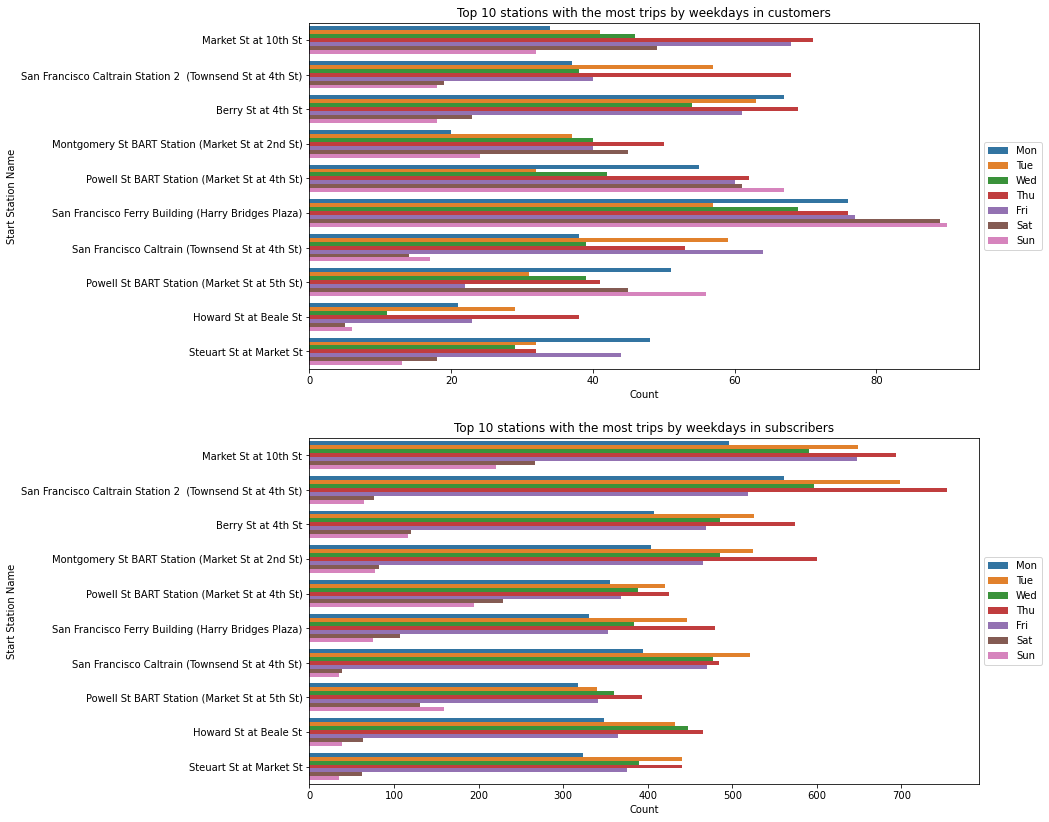

In [8]:
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=df_cust, y='start_station_name', hue='start_weekday_char', order=st_stat_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top 10 stations with the most trips by weekdays in customers')

ax = plt.subplot(212)
sb.countplot(data=df_sub, y='start_station_name', hue='start_weekday_char', order=st_stat_order)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Start Station Name')
plt.xlabel('Count')
plt.title('Top 10 stations with the most trips by weekdays in subscribers');

## The duration of customers' trips by time groups in top 10 stations

> In customers, the duration of trips is longer than subscribers'. The medians fall between 1,000 and 2,000 seconds. The duration of trips at night is longer than in the morning and afternoon which needs to be investigated deeper.

<Figure size 432x288 with 0 Axes>

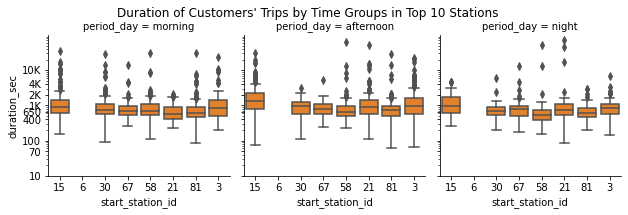

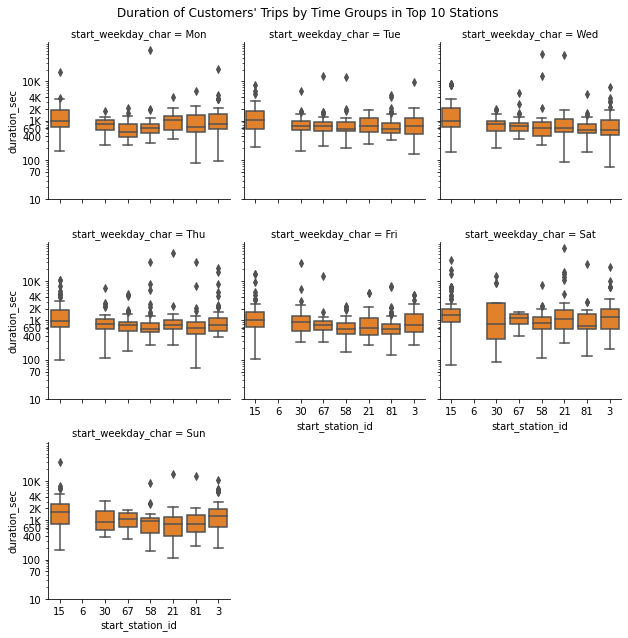

In [14]:
times_chr = ['period_day','start_weekday_char']
base_color = sb.color_palette()[1]
for i in range(1, 3):
    plt.subplots_adjust(top=0.85)
    g = sb.FacetGrid(data=df_cust, col=times_chr[i-1], col_wrap=3)
    g.fig.suptitle('Duration of Customers\' Trips by Time Groups in Top 10 Stations')
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color)
    plt.yscale('log')
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);

## The durations of subscribers' trips by time groups in top 10 stations

> For subscribers, the duration of trips is shorter than customers'. The medians of the durations fall around 650 seconds. The trip at night is also longer than the other time of day which needs to be investigated.

<Figure size 432x288 with 0 Axes>

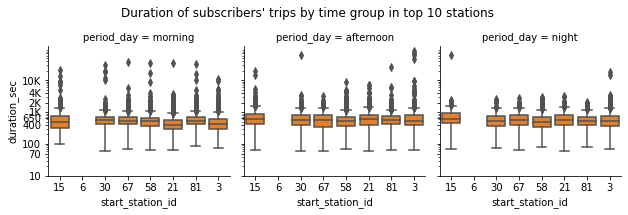

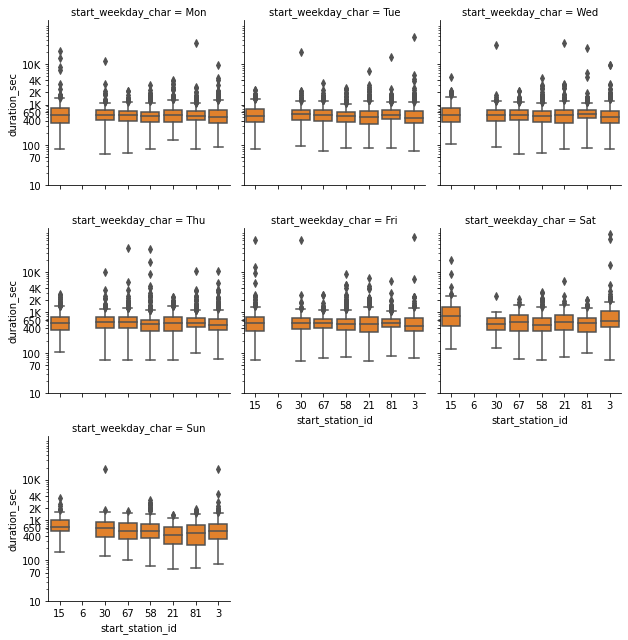

In [15]:
base_color = sb.color_palette()[1]
for i in range(1, 3):
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle('Duration of subscribers\' trips by time group in top 10 stations')
    g = sb.FacetGrid(data=df_sub, col=times_chr[i-1], col_wrap=3)
    g.map(sb.boxplot,'start_station_id', 'duration_sec', order=[15,6,30,67,58,21,81,3], color=base_color)
    plt.yscale('log')
    plt.yticks([10,50,100,400,650,1000,2000,4000,10000], [10,70,100,400,650,'1K','2K','4K','10K']);

In [4]:
!jupyter nbconvert <Part_II_Ford_GoBike_Trip_Data_Exploration_slide_deck>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.


## Summary

> All of the most trips happen at the stations in San Francisco. User types play an important role here to impact the number of trips in each time groups. Thus, getting more user types' attributes will help understand the characteristics of trips more and attract higher traffics for this program.